<a href="https://colab.research.google.com/github/zmarshall4497/dsba/blob/main/Assignment_4_Forecasting_%7C_Zach_Marshall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import data set
import pandas as pd
from google.colab import files 
import io

upload = files.upload()

dfZM = pd.read_csv(io.BytesIO(upload['AustralianWines.csv']))

Saving AustralianWines.csv to AustralianWines.csv


In [7]:
#data explore
dfZM.info()
dfZM.head()
dfZM.isnull().sum()
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   180 non-null    object
 1   Red     181 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   180 non-null    object
 1   Red     181 non-null    object
dtypes: object(2)
memory usage: 3.1+ KB


In [9]:
print(dfZM['Month'])

0      Jan-80
1      Feb-80
2      Mar-80
3      Apr-80
4      May-80
        ...  
183       NaN
184       NaN
185       NaN
186       NaN
187       NaN
Name: Month, Length: 188, dtype: object


In [10]:
#drop NA
dfZM = dfZM.dropna()

In [11]:
dfZM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   180 non-null    object
 1   Red     180 non-null    object
dtypes: object(2)
memory usage: 4.2+ KB


In [12]:
dfZM.isnull().sum()

Month    0
Red      0
dtype: int64

In [14]:
#convert month to datetime format
dfZM['Month'] = pd.to_datetime(dfZM['Month'], format= '%b-%y')
dfZM.head()

,Month,Red
0,1980-01-01,464
1,1980-02-01,675
2,1980-03-01,703
3,1980-04-01,887
4,1980-05-01,1139


Please use the last two years of data as the validation dataset

In [16]:
#creating validation dataset and train set  
trainZM = dfZM.iloc[:-24]
testZM = dfZM.iloc[-24:]


In [21]:
print(dfZM.columns)

Index(['Month', 'Red '], dtype='object')


Please show the plot of the entire dataset.

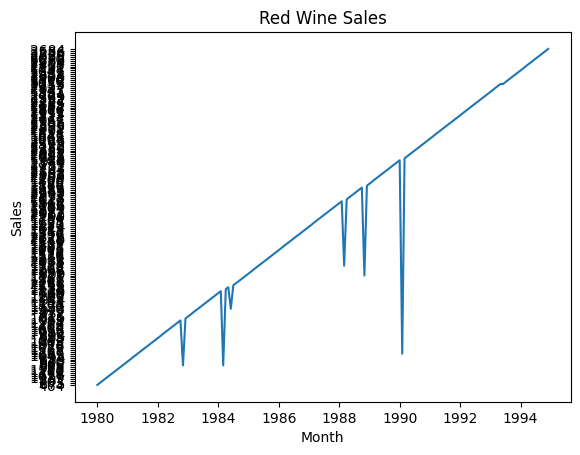

In [23]:
#plotting entire dataset
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

plt.plot(dfZM.Month, dfZM['Red '])
plt.title('Red Wine Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [30]:
dfZM['Red '].isnull().sum()

0

Please run different forecasting models and compare their model performance.

In [31]:
# linear trend model
linear_model = Holt(trainZM['Red ']).fit()
linear_predictions = linear_model.forecast(len(testZM))

In [32]:
# seasonality model
seasonal_model = ExponentialSmoothing(trainZM['Red '], seasonal='add', seasonal_periods=12).fit()
seasonal_predictions = seasonal_model.forecast(len(testZM))

In [33]:
# linear trend and seasonality model
linear_seasonal_model = ExponentialSmoothing(trainZM['Red '], trend='add', seasonal='add', seasonal_periods=12).fit()
linear_seasonal_predictions = linear_seasonal_model.forecast(len(testZM))

In [34]:
# simple exponential smoothing model
simple_exp_model = SimpleExpSmoothing(trainZM['Red ']).fit()
simple_exp_predictions = simple_exp_model.forecast(len(testZM))

In [36]:
#compare model performances

#MAE
from sklearn.metrics import mean_absolute_error

linear_mae = mean_absolute_error(testZM['Red '], linear_predictions)
seasonal_mae = mean_absolute_error(testZM['Red '], seasonal_predictions)
linear_seasonal_mae = mean_absolute_error(testZM['Red '], linear_seasonal_predictions)
simple_exp_mae = mean_absolute_error(testZM['Red '], simple_exp_predictions)

print("Linear MAE:", linear_mae)
print("Seasonal MAE:", seasonal_mae)
print("Linear Seasonal MAE:", linear_seasonal_mae)
print("Simple Exp MAE:", simple_exp_mae)

Linear MAE: 697.584050028252
Seasonal MAE: 267.694575877772
Linear Seasonal MAE: 212.79711221926922
Simple Exp MAE: 506.65132413013725


Based off the MAE Results, the Linear Seasonal Model has the lowest MAE of 212.797 which is the best performance amongst the models.

In [37]:
#MSE
from sklearn.metrics import mean_squared_error

linear_mse = mean_squared_error(testZM['Red '], linear_predictions)
seasonal_mse = mean_squared_error(testZM['Red '], seasonal_predictions)
linear_seasonal_mse = mean_squared_error(testZM['Red '], linear_seasonal_predictions)
simple_exp_mse = mean_squared_error(testZM['Red '], simple_exp_predictions)

print("Linear Trend MSE:", linear_mse)
print("Seasonality MSE:", seasonal_mse)
print("Linear Trend and Seasonality MSE:", linear_seasonal_mse)
print("Simple Exponential Smoothing MSE:", simple_exp_mse)

Linear Trend MSE: 658830.1039522247
Seasonality MSE: 118449.97158223204
Linear Trend and Seasonality MSE: 91002.75036945741
Simple Exponential Smoothing MSE: 474009.1451426098


Based off the MSE Results, the Linear Trend and Seasonality Model has the lowest MSE of 91002.750, which means it has the best performance amongst the four models.

Please provide results for each model estimation.

In [38]:
# linear trend model
linear_model = Holt(trainZM['Red ']).fit()
print(linear_model.summary())

linear_predictions = linear_model.forecast(len(testZM))

# seasonality model
seasonal_model = ExponentialSmoothing(trainZM['Red '], seasonal='add', seasonal_periods=12).fit()
print(seasonal_model.summary())

seasonal_predictions = seasonal_model.forecast(len(testZM))

# linear trend and seasonality model
linear_seasonal_model = ExponentialSmoothing(trainZM['Red '], trend='add', seasonal='add', seasonal_periods=12).fit()
print(linear_seasonal_model.summary())

linear_seasonal_predictions = linear_seasonal_model.forecast(len(testZM))

# simple exponential smoothing model
simple_exp_model = SimpleExpSmoothing(trainZM['Red ']).fit()
print(simple_exp_model.summary())

simple_exp_predictions = simple_exp_model.forecast(len(testZM))


                              Holt Model Results                              
Dep. Variable:                   Red    No. Observations:                  156
Model:                           Holt   SSE                       21659876.697
Optimized:                       True   AIC                           1855.214
Trend:                       Additive   BIC                           1867.414
Seasonal:                        None   AICC                          1855.778
Seasonal Periods:                None   Date:                 Mon, 24 Apr 2023
Box-Cox:                        False   Time:                         19:40:19
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6673334                alpha                 True
smoothing_trend            0.0326385                